# Project: Graph of ...

In [1]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import ssl
import requests

%matplotlib inline

import json

## Get Data

In [2]:
path = os.path.join('/', *os.getcwd().split('/')[1:-2], '.data')

file_name = 'currently_licensed_wildlife_rehabilitators_1.csv'

raw_data = pd.read_csv(os.path.join(path, file_name))

raw_data.keys()

Index(['county', 'city', 'species_accepted', 'rabies_certified',
       'licensee_name', 'business_phone', 'license_effective_date',
       'license_expiration_date', 'license_type', 'license_number',
       'federal_permit_number'],
      dtype='object')

## Clean and organize dataframe

In [3]:
raw_data['species_accepted']

0                                          Small Mammals
1                                          Small Mammals
2                                 Raptors, Small Mammals
3                                          Small Mammals
4                                          Small Mammals
                             ...                        
357    Amphibians, Large Mammals, Reptiles, Small Mam...
358    Amphibians, Game Birds, Passerines, Reptiles, ...
359                                        Small Mammals
360                                        Small Mammals
361                                        Large Mammals
Name: species_accepted, Length: 362, dtype: object

In [4]:
data_unique = raw_data['species_accepted'].unique()


In [5]:
# Split the comma-separated strings and remove any leading/trailing whitespace
split_values = [item.strip() for sublist in data_unique if isinstance(sublist, str) for item in sublist.split(',')]

# Get the unique values using a set
unique_values = set(split_values)

print("Unique values:", unique_values)

Unique values: {'Small Game', 'Waterfowl', 'Amphibians', 'Raptors', 'Small Mammals', 'Game Birds', 'Reptiles', 'Large Mammals', 'Passerines'}


In [6]:
raw_data['species_accepted'].head()

0             Small Mammals
1             Small Mammals
2    Raptors, Small Mammals
3             Small Mammals
4             Small Mammals
Name: species_accepted, dtype: object

In [7]:
# Count occurrences of each unique value in the pandas Series
occurrences = {
    value: raw_data['species_accepted'].str.count(value).sum()
    for value in unique_values
}

print("Occurrences of each unique value:", occurrences)

Occurrences of each unique value: {'Small Game': 1.0, 'Waterfowl': 15.0, 'Amphibians': 27.0, 'Raptors': 58.0, 'Small Mammals': 254.0, 'Game Birds': 49.0, 'Reptiles': 27.0, 'Large Mammals': 65.0, 'Passerines': 21.0}


In [8]:
unique_values, occurrences = [list(i) for i in (occurrences.keys(), occurrences.values())]

In [9]:
words = file_name.split('_')[:-1]
capitalized_words = [word.capitalize() for word in words]
short_label = ' '.join(capitalized_words)
short_label


'Currently Licensed Wildlife Rehabilitators'

## Graph the data

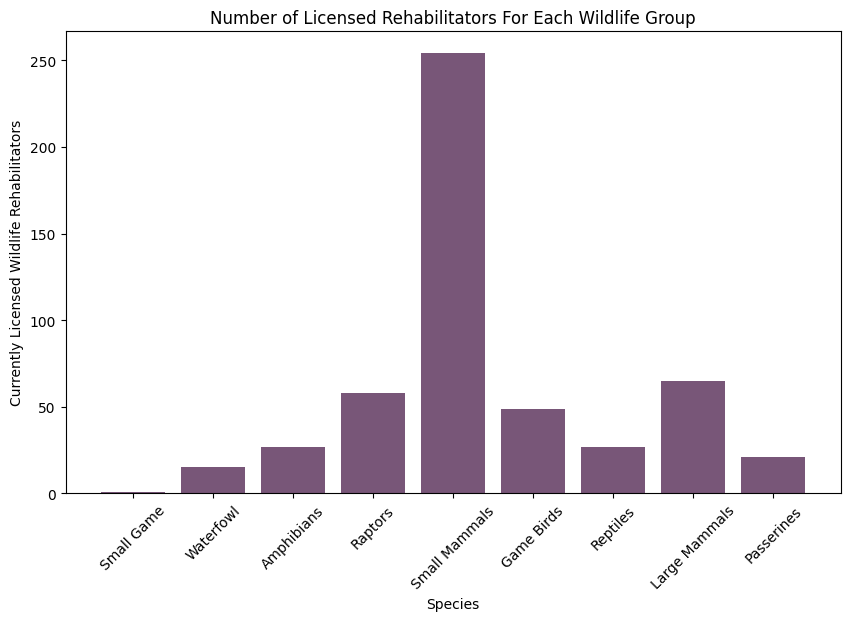

In [16]:
# Create a bar chart with the unique values and their occurrences
plt.figure(figsize=(10, 6))
plt.bar(unique_values, occurrences, color='#785678')


# Labels
plt.xlabel('Species')
plt.ylabel(short_label)
plt.title("Number of Licensed Rehabilitators For Each Wildlife Group")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## Conclusions


The data suggests...